In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
data = pd.read_csv('/home/dan/Documents/Repo/smu-dal-data-pt-09-2021-u-c/02-Homework/20-Unsupervised-Learning/Instructions/crypto_data.csv')

In [29]:
data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [30]:
data['TotalCoinsMined'] = data.TotalCoinsMined.astype(str)

In [31]:
data['TotalCoinsMined']

0            41.99995383
1                    nan
2          1055184902.04
3                    nan
4                    0.0
              ...       
1247     128326.99633965
1248    21491213.4644496
1249                 nan
1250                 nan
1251                 nan
Name: TotalCoinsMined, Length: 1252, dtype: object

In [32]:
del data['Unnamed: 0']
del data['CoinName']

In [33]:
data

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,41.99995383,42
1,X11,True,PoW/PoS,nan,2300000000
2,Scrypt,True,PoW/PoS,1055184902.04,532000000
3,SHA-256,True,PoW,nan,611000
4,SHA-256,True,PoW/PoS,0.0,0
...,...,...,...,...,...
1247,Scrypt,True,PoS,128326.99633965,1000000
1248,Scrypt,False,PoW/PoS,21491213.4644496,100000000
1249,Scrypt,False,PoW/PoS,nan,233100000
1250,SHA-256,False,PoW/PoS,nan,21000000


In [34]:
data.drop(data[data['IsTrading'] == False].index, inplace= True)

In [35]:
data.drop(data[data['TotalCoinsMined'] == 'nan'].index, inplace= True)

In [36]:
updated_data = pd.get_dummies(data = data, columns=['Algorithm','IsTrading','ProofType'])

In [37]:
updated_data['TotalCoinsMined'].info()

<class 'pandas.core.series.Series'>
Int64Index: 685 entries, 0 to 1247
Series name: TotalCoinsMined
Non-Null Count  Dtype 
--------------  ----- 
685 non-null    object
dtypes: object(1)
memory usage: 10.7+ KB


In [38]:
updated_data

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,41.99995383,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1055184902.04,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,29279424622.5027,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,17927175.0,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1999999995.3056,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,14931046.1546605,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,980222595.0,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7296537.5,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(updated_data)

In [40]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
data_pca = pca.fit_transform(updated_data)

In [41]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data= data_pca, columns=["principal_component_1", "principal_component_2"]
)
df_pca.head()

,principal_component_1,principal_component_2
0,-1.346564e+14,-4.145018e+09
1,-1.346558e+14,-3.089833e+09
2,-1.346564e+14,-4.145018e+09
3,-1.343422e+14,2.513442e+10
4,-1.346564e+14,-4.127091e+09


In [43]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([1.00000000e+00, 1.30648225e-10])

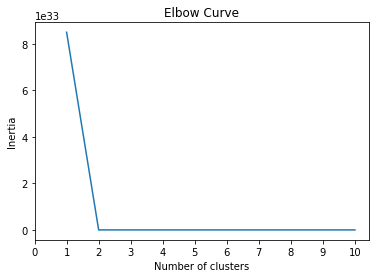

In [44]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,principal_component_1,principal_component_2,class
0,-1.346564e+14,-4.145018e+09,0
1,-1.346558e+14,-3.089833e+09,0
2,-1.346564e+14,-4.145018e+09,0
3,-1.343422e+14,2.513442e+10,0
4,-1.346564e+14,-4.127091e+09,0


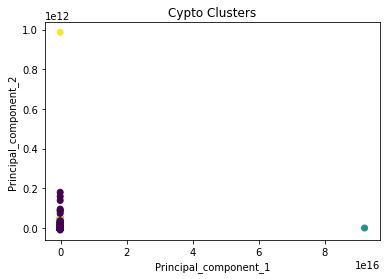

In [46]:
# Visualize the clusterss
plt.scatter(x=df_pca['principal_component_1'], y=df_pca['principal_component_2'], c=df_pca['class'])
plt.xlabel('Principal_component_1')
plt.ylabel('Principal_component_2')
plt.title('Cypto Clusters')
plt.show()

##### 